<a href="https://colab.research.google.com/github/tzlilLV97/Mission1DeepLearning/blob/main/fridayfriday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Alon Feldman 312213135\
Tzlil lev-or 2222222**


## Question 1. Data


In [ ]:
import pandas
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
load_from_drive = True

if not load_from_drive:
  csv_path = "http://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip"
else:
  from google.colab import drive
  drive.mount('/content/gdrive')
  csv_path = '/content/gdrive/My Drive/YearPredictionMSD.txt.zip' # TODO - UPDATE ME WITH THE TRUE PATH!

t_label = ["year"]
x_labels = ["var%d" % i for i in range(1, 91)]
df = pandas.read_csv(csv_path, names=t_label + x_labels)

Mounted at /content/gdrive


In [ ]:
df

,year,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var81,var82,var83,var84,var85,var86,var87,var88,var89,var90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515340,2006,51.28467,45.88068,22.19582,-5.53319,-3.61835,-16.36914,2.12652,5.18160,-8.66890,...,4.81440,-3.75991,-30.92584,26.33968,-5.03390,21.86037,-142.29410,3.42901,-41.14721,-15.46052
515341,2006,49.87870,37.93125,18.65987,-3.63581,-27.75665,-18.52988,7.76108,3.56109,-2.50351,...,32.38589,-32.75535,-61.05473,56.65182,15.29965,95.88193,-10.63242,12.96552,92.11633,10.88815
515342,2006,45.12852,12.65758,-38.72018,8.80882,-29.29985,-2.28706,-18.40424,-22.28726,-4.52429,...,-18.73598,-71.15954,-123.98443,121.26989,10.89629,34.62409,-248.61020,-6.07171,53.96319,-8.09364
515343,2006,44.16614,32.38368,-3.34971,-2.49165,-19.59278,-18.67098,8.78428,4.02039,-12.01230,...,67.16763,282.77624,-4.63677,144.00125,21.62652,-29.72432,71.47198,20.32240,14.83107,39.74909


In [ ]:
df["year"] = df["year"].map(lambda x: int(x > 2000))

In [ ]:
df.head(20)

,year,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var81,var82,var83,var84,var85,var86,var87,var88,var89,var90
0,1,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,1,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,1,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,1,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,1,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
5,1,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263
6,1,50.57546,33.17843,50.53517,11.55217,-27.24764,-8.78206,-12.04282,-9.53930,28.61811,...,11.63681,25.44182,134.62382,21.51982,8.17570,35.46251,11.57736,4.50056,-4.62739,1.40192
7,1,48.26892,8.97526,75.23158,24.04945,-16.02105,-14.09491,8.11871,-1.87566,7.46701,...,18.03989,-58.46192,-65.56438,46.99856,-4.09602,56.37650,-18.29975,-0.30633,3.98364,-3.72556
8,1,49.75468,33.99581,56.73846,2.89581,-2.92429,-26.44413,1.71392,-0.55644,22.08594,...,18.70812,5.20391,-27.75192,17.22100,-0.85210,-15.67150,-26.36257,5.48708,-9.13495,6.08680
9,1,45.17809,46.34234,-40.65357,-2.47909,1.21253,-0.65302,-6.95536,-12.20040,17.02512,...,-4.36742,-87.55285,-70.79677,76.57355,-7.71727,3.26926,-298.49845,11.49326,-89.21804,-15.09719


### Part (a)

In [ ]:
df_train = df[:463715]
df_test = df[463715:]

# convert to numpy
train_xs = df_train[x_labels].to_numpy()
train_ts = df_train[t_label].to_numpy()
test_xs = df_test[x_labels].to_numpy()
test_ts = df_test[t_label].to_numpy()

# Write your explanation here
# like overfitting- in Tzlil notebook -  להסביר שיהיה תלות (מידע הדדי) בין שירים שונים של אותו הזמר

### Part (b)

In [ ]:
feature_means = df_train.mean()[1:].to_numpy() # the [1:] removes the mean of the "year" field
feature_stds  = df_train.std()[1:].to_numpy()

train_norm_xs = (train_xs - feature_means) / feature_stds
test_norm_xs = (test_xs - feature_means) / feature_stds

In [ ]:
# Write your explanation here
# to make them from the same distrabtion - Tzlil notebook - להסביר שאם אימנו את המשקולות לפי נרמול מסויים אז נרצה לנרמל את המידע שנשערך לפי אותו נרמול

### Part (c)

In [ ]:
# shuffle the training set
reindex = np.random.permutation(len(train_xs))
train_xs = train_xs[reindex]
train_norm_xs = train_norm_xs[reindex]
train_ts = train_ts[reindex]

# use the first 50000 elements of `train_xs` as the validation set
train_xs, val_xs           = train_xs[50000:], train_xs[:50000]
train_norm_xs, val_norm_xs = train_norm_xs[50000:], train_norm_xs[:50000]
train_ts, val_ts           = train_ts[50000:], train_ts[:50000]

# Write your explanation here
# do make sure it is still "independence new data"- Tzlil notebook

## Part 2. Classification


In [ ]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))
    
def cross_entropy(t, y):
  e=0.00001 #To avoid log(0)=-inf
  cross_entropy=  return -t * np.log(y+e) - (1 - t) * np.log(1 - y+e)

  return cross_entropy

def cost(y, t):
  return np.mean(cross_entropy(t, y))

def get_accuracy(y, t):
  acc = 0
  N = 0
  for i in range(len(y)):
    N += 1
    if (y[i] >= 0.5 and t[i] == 1) or (y[i] < 0.5 and t[i] == 0):
      acc += 1
  return acc / N

### Part (a) 


In [ ]:
def pred(w, b, X):
  """
  Returns the prediction `y` of the target based on the weights `w` and scalar bias `b`.

  Preconditions: np.shape(w) == (90,)
                 type(b) == float
                 np.shape(X) = (N, 90) for some N

  >>> pred(np.zeros(90), 1, np.ones([2, 90]))
  array([0.73105858, 0.73105858]) # It's okay if your output differs in the last decimals
  """
  # Your code goes here 
  return sigmoid(np.dot(X,np.transpose(w))+b)

pred(np.zeros(90), 1, np.ones([2, 90]))


array([0.73105858, 0.73105858])

### Part (b) 

In [ ]:
def derivative_cost(X, y, t):
  """
  Returns a tuple containing the gradients dLdw and dLdb.

  Precondition: np.shape(X) == (N, 90) for some N
                np.shape(y) == (N,)
                np.shape(t) == (N,)

  Postcondition: np.shape(dLdw) = (90,)
           type(dLdb) = float
  """
  # Your code goes here
  N=len(y)
  error=y-t
  dLdw=1/N*np.dot(np.transpose(X),error)
  dLdb=np.mean(error)
  return (dLdw,dLdb)


# **Explenation on Gradients**

\begin{align}
        &\frac{\partial C}{\partial w_j}=\frac{\partial C}{\partial \sigma}\frac{\partial \sigma}{\partial z}\frac{\partial z}{\partial w_j} \\
        &C=\frac{1}{N}\sum_{i=1}^N-t_i\cdot log(\sigma_i)-(1-t_i)\cdot log(1-\sigma_i)\\
        &\sigma_i=sigmoid(z_i)\\
        &z_i=w^T\cdot x_i+b\\
        &\frac{\partial C}{\partial \sigma}=\frac{1}{N}\sum_{i=1}^N\frac{\sigma(z)-t}{\sigma(z)(1-\sigma(z))}\\
        &\frac{\partial \sigma}{\partial z}=\sigma(z)(1-\sigma(z))\\
        &\frac{\partial z}{\partial w_j}=x^j →\text{ the j feature of sample x}\\
        &\frac{\partial C}{\partial w_j}=(\sigma(z)-t) \cdot x^j \\
        &\text{For $\frac{\partial C}{\partial b}$ we get  the mean error i.e $error_i=\sigma(z_i)-t_i$}\\
        &\text{And $\frac{\partial C}{\partial b}=\frac{1}{N}\sum_{i=1}^Nerror_i$}\\
        &\text{Finally in Vector Form:}\\
        &\frac{\partial C}{\partial w}=\frac{1}{N}X^T\cdot \vec{error}
    \end{align}

### Part (c)
 $\frac{\partial\mathcal{L}}{\partial b}$

In [ ]:
# Your code goes here
b=1
h=0.00001
X=np.ones([2, 90])
y=pred(np.zeros(90), b, X)       #this is for x in f(x)
y_h=pred(np.zeros(90), b+h, X)   #this is for x+h f(x+h)
t=np.ones(2)

r1 = (cost(y_h,t)-cost(y,t))/h      #f(x+h)-f(x)/h
_,r2 = derivative_cost(X,y,t)
print("The analytical results is -", r1)
print("The algorithm results is - ", r2)


The analytical results is - -0.26892791236410307
The algorithm results is -  -0.2689414213699951


### Part (d)
 $\frac{\partial\mathcal{L}}{\partial {\bf w}}$

In [ ]:
# Your code goes here. You might find this below code helpful: but it's
# up to you to figure out how/why, and how to modify the code
b=1
w=np.zeros(90)
h=0.0001
X=np.ones([2, 90])
y=pred(w, b, X)       #this is for x in f(x)
t=np.ones(2)
r1=np.zeros(90)
for i in range(90):
  w[i]+=h
  y_h=pred(w, b, X)   #this is for x+h f(x+h)
  w[i]-=h
  r1[i] = (cost(y_h,t)-cost(y,t))/h      #f(x+h)-f(x)

r2,_ = derivative_cost(X,y,t)
print("The analytical results is -", r1)
print("The algorithm results is - ", r2)



The analytical results is - [-0.26892791 -0.26892791 -0.26892791 -0.26892791 -0.26892791 -0.26892791
 -0.26892791 -0.26892791 -0.26892791 -0.26892791 -0.26892791 -0.26892791
 -0.26892791 -0.26892791 -0.26892791 -0.26892791 -0.26892791 -0.26892791
 -0.26892791 -0.26892791 -0.26892791 -0.26892791 -0.26892791 -0.26892791
 -0.26892791 -0.26892791 -0.26892791 -0.26892791 -0.26892791 -0.26892791
 -0.26892791 -0.26892791 -0.26892791 -0.26892791 -0.26892791 -0.26892791
 -0.26892791 -0.26892791 -0.26892791 -0.26892791 -0.26892791 -0.26892791
 -0.26892791 -0.26892791 -0.26892791 -0.26892791 -0.26892791 -0.26892791
 -0.26892791 -0.26892791 -0.26892791 -0.26892791 -0.26892791 -0.26892791
 -0.26892791 -0.26892791 -0.26892791 -0.26892791 -0.26892791 -0.26892791
 -0.26892791 -0.26892791 -0.26892791 -0.26892791 -0.26892791 -0.26892791
 -0.26892791 -0.26892791 -0.26892791 -0.26892791 -0.26892791 -0.26892791
 -0.26892791 -0.26892791 -0.26892791 -0.26892791 -0.26892791 -0.26892791
 -0.26892791 -0.2689279

### Part (e)

In [ ]:
def run_gradient_descent(w0, b0, mu=0.1, batch_size=100, max_iters=100):
  """Return the values of (w, b) after running gradient descent for max_iters.
  We use:
    - train_norm_xs and train_ts as the training set
    - val_norm_xs and val_ts as the test set
    - mu as the learning rate
    - (w0, b0) as the initial values of (w, b)

  Precondition: np.shape(w0) == (90,)
                type(b0) == float
 
  Postcondition: np.shape(w) == (90,)
                 type(b) == float
  """
  w = w0
  b = b0
  train_xs=train_xs1
  train_ts=train_ts1
  train_norm_xs=train_norm_xs1
  iter = 0
  running_cost=[]

  while iter < max_iters:
    # shuffle the training set (there is code above for how to do this)
    reindex = np.random.permutation(len(train_xs))
    train_xs = train_xs[reindex]
    train_norm_xs = train_norm_xs[reindex]
    train_ts = train_ts[reindex]

    for i in range(0, len(train_norm_xs), batch_size): # iterate over each minibatch
      # minibatch that we are working with:
      X = train_norm_xs[i:(i + batch_size)]
      t = train_ts[i:(i + batch_size), 0]

      # since len(train_norm_xs) does not divide batch_size evenly, we will skip over
      # the "last" minibatch
      if np.shape(X)[0] != batch_size:
        continue

      # compute the prediction
      y=pred(w,b,X)
      # update w and b
      dLdw , dLdb = derivative_cost(X,y,t)
      b=b-mu*dLdb
      w=w-mu*dLdw
    # increment the iteration count
    iter += 1
    # compute and print the *validation* loss and accuracy
    if (iter % 10 == 0):
      val_y=pred(w,b,val_norm_xs)
      val_cost = cost(val_y,val_ts)
      val_acc = get_accuracy(val_y,val_ts)
      running_cost.append(val_cost)
      print("Iter %d. [Val Acc %.0f%%, Loss %f]" % (iter, val_acc * 100, val_cost))

    if iter >= max_iters:
      break

    # Think what parameters you should return for further use
  
  return w,b,running_cost,val_acc



### Part (f)


In [ ]:
w0 = np.random.randn(90)
b0 = np.random.randn(1)[0]

# Write your code here
mu=[0.001,0.2,0.5,5,15] #check for 5 value of mu
run_cost=[[] for i in range(len(mu))] #array to save the learning process
for m in range(len(mu)):  #for each learning rate mu, run gradient descent and save the learning cosr process
  _,_,costRun,accRun=run_gradient_descent(w0,b0,mu=mu[m])
  run_cost[m]=costRun

#plot resulte
for m in range(len(mu)):
  plt.plot([10*i for i in range(len(run_cost[m]))],run_cost[m])
plt.xlabel("iteration")
plt.ylabel("cost")
plt.legend(mu)
plt.show()


Iter 10. [Val Acc 71%, Loss 0.991670]
Iter 20. [Val Acc 73%, Loss 0.870124]
Iter 30. [Val Acc 73%, Loss 0.858341]
Iter 40. [Val Acc 73%, Loss 0.858172]
Iter 50. [Val Acc 74%, Loss 0.856827]
Iter 60. [Val Acc 74%, Loss 0.857416]
Iter 70. [Val Acc 74%, Loss 0.857661]
Iter 80. [Val Acc 74%, Loss 0.857764]
Iter 90. [Val Acc 74%, Loss 0.857195]
Iter 100. [Val Acc 74%, Loss 0.857996]
Iter 10. [Val Acc 73%, Loss 0.874679]
Iter 20. [Val Acc 73%, Loss 0.870297]
Iter 30. [Val Acc 73%, Loss 0.873979]
Iter 40. [Val Acc 73%, Loss 0.887878]
Iter 50. [Val Acc 73%, Loss 0.880170]
Iter 60. [Val Acc 73%, Loss 0.876760]
Iter 70. [Val Acc 72%, Loss 0.893191]
Iter 80. [Val Acc 73%, Loss 0.869019]
Iter 90. [Val Acc 73%, Loss 0.879380]
Iter 100. [Val Acc 73%, Loss 0.855958]
Iter 10. [Val Acc 72%, Loss 0.895031]
Iter 20. [Val Acc 70%, Loss 0.895556]
Iter 30. [Val Acc 72%, Loss 0.909215]
Iter 40. [Val Acc 72%, Loss 0.917202]
Iter 50. [Val Acc 72%, Loss 0.903796]
Iter 60. [Val Acc 70%, Loss 0.940046]
Iter 70. [

**Explain and discuss your results here:**
 $$$$
As we see, for too small learning rate ($\mu=0.001$) the convergence is  very slow, almost can't be seen at the graph. $$$$
For too large learning rate ($\mu=5,15$) there is no convergence - it's not even monotonic. $$$$
For good value of learning rate ($\mu=0.2,0.5$) we can see fast and good convergence.$$$$
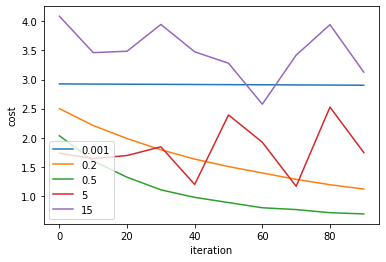


$$$$
Discussion:
As we can see, when the learning rate is too big, there is a high overshoot due to large step size, and when it too small, it does converge but really really slowly as we've learned in class. we can see when using 100 iteration and batch size of 10, the proper value of the step size is around $\frac{1}{2}$. 
The algorithm of SGD is calculating gradient at each iteration , so when the step size is too big , it can "throw" you away from the minimum , so it will increase the gradiant even more in the next iteration.


### Part (g)

In [ ]:
w0 = np.random.randn(90)
b0 = np.random.randn(1)[0]
# Write your code here
resulteArray=[[] for i in range(1,11)]
for m in range(1,11):
  for batch in range(1,11):
    w,b,costRun=run_gradient_descent(w0,b0,mu=m*0.1,batch_size=10*batch)
    resulteArray[m].append([w,b,costRun[-1],m*0.1,batch*10])
resulteArray.sort(key=lambda x:x[2])  #now it 2d array maybe need to change
#plot 3d graph?
print(resulteArray[0])


**Explain and discuss your results here:**


In [ ]:
try_this=myplace  #need to delete this i think

In [ ]:
#dont need this?
w0 = np.random.randn(90)
b0 = np.random.randn(1)[0]
N = len(try_this)
mu=[try_this[0][-2], try_this[N//4][-2], try_this[N//2][-2], try_this[3*N//4][-2]]
batch=[try_this[0][-1], try_this[N//4][-1], try_this[N//2][-1], try_this[3*N//4][-1]]
run_cost=[[] for i in range(len(mu))]
run_acc=[[] for i in range(len(mu))]
# Write your code here
i =0
for u,b in zip(mu,batch):
  _,_,costRun,accRun=run_gradient_descent(train_xs,train_ts,train_norm_xs,w0,b0,u,b)
  run_cost[i]=costRun
  run_acc[i]=accRun
  i+=1

for m in range(len(mu)):
  plt.plot([10*i for i in range(len(run_cost[m]))],run_cost[m])
plt.xlabel("iteration")
plt.ylabel("cost")
plt.legend(["u={0},batch={1}".format(round(mu[0],4),batch[0]),"u={0},batch={1}".format(round(mu[1],4),batch[1]),"u={0},batch={1}".format(round(mu[2],4),batch[2]),"u={0},batch={1}".format(round(mu[3],4),batch[3])])
plt.show()

### Part (h)

In [ ]:
# Write your code here
w=try_this[0][0]
b=try_this[0][1]

pred_train=pred(w,b,train_norm_xs)
pred_val=pred(w,b,val_norm_xs)
pred_test=pred(w,b,test_norm_xs)

train_acc = get_accuracy(pred_train,train_ts)
val_acc = get_accuracy(pred_val,val_ts)
test_acc = get_accuracy(pred_test,test_ts)

print('train_acc = ', train_acc, ' val_acc = ', val_acc, ' test_acc = ', test_acc)

**Explain and discuss your results here:**

As we could guesses, there is a difference between the accuracies, because Every one of the accuricies was calculated on different and unique data set. 
But they are very familliar, because our model predicted successfully the probability rule of the data.

### Part (i)

In [ ]:
import sklearn.linear_model

model = sklearn.linear_model.LogisticRegression()
model.fit(train_norm_xs,train_ts)

pred_train=model.predict(train_norm_xs)
pred_val=model.predict(val_norm_xs)
pred_test=model.predict(test_norm_xs)

train_acc = get_accuracy(pred_train,train_ts)
val_acc = get_accuracy(pred_val,val_ts)
test_acc = get_accuracy(pred_test,test_ts)

print('train_acc = ', train_acc, ' val_acc = ', val_acc, ' test_acc = ', test_acc)